In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score


In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [17]:
# sns.set(style="whitegrid")

# # 1. Plot the target class distribution
# plt.figure(figsize=(6, 4))
# sns.countplot(x='Class', data=data)
# plt.title("Distribution of Target Class (Fraud vs. Non-Fraud)")
# plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
# plt.ylabel("Number of Samples")
# plt.show()

# # 2. Plot the distribution of the Amount variable
# plt.figure(figsize=(8, 6))
# sns.histplot(data['Amount'], bins=50, kde=True)
# plt.title("Distribution of Transaction Amounts")
# plt.xlabel("Amount")
# plt.ylabel("Frequency")
# plt.show()

# # 3. Plot the distribution of the Time variable
# plt.figure(figsize=(8, 6))
# sns.histplot(data['Time'], bins=50, kde=True)
# plt.title("Distribution of Transaction Times")
# plt.xlabel("Time (seconds since first transaction)")
# plt.ylabel("Frequency")
# plt.show()

# # 4. Plot pair plots of V1 to V4 features to explore possible correlations
# sns.pairplot(data[['V1', 'V2', 'V3', 'V4', 'Class']], hue="Class", palette="husl", plot_kws={'alpha':0.2})
# plt.suptitle("Pair Plot of Selected Anonymized Features", y=1.02)
# plt.show()

# # 5. Correlation heatmap for V1 to V28 features
# plt.figure(figsize=(12, 10))
# correlation_matrix = data.drop(columns=['Time', 'Amount']).corr()
# sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=False)
# plt.title("Correlation Matrix of Features (V1 to V28)")
# plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11292\3636017681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


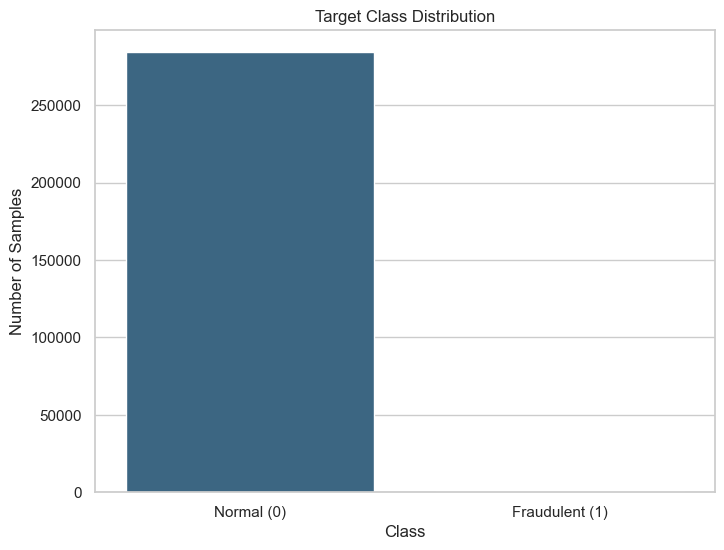


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Class Percentages:
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks([0, 1], ['Normal (0)', 'Fraudulent (1)'])
plt.show()

# Display class percentages
class_counts = data['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)
print("\nClass Percentages:\n", data['Class'].value_counts(normalize=True) * 100)


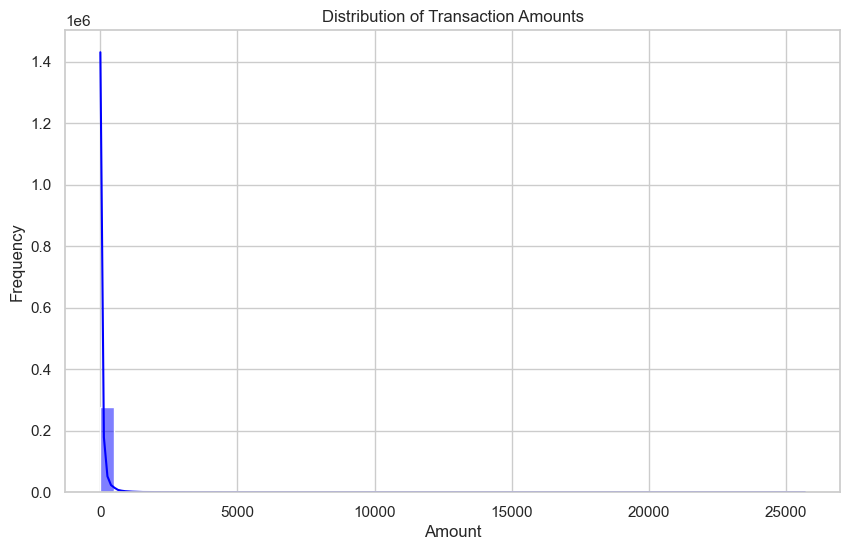

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


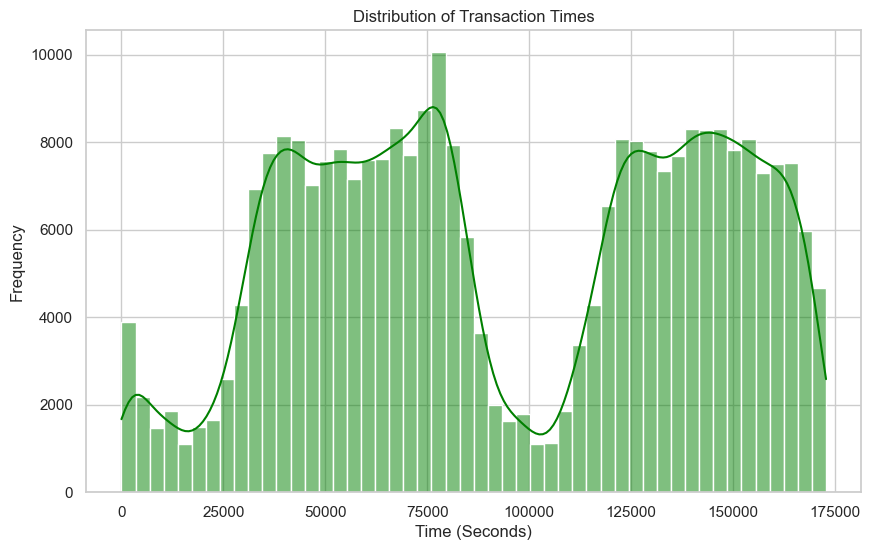

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title("Distribution of Transaction Times")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency")
plt.show()

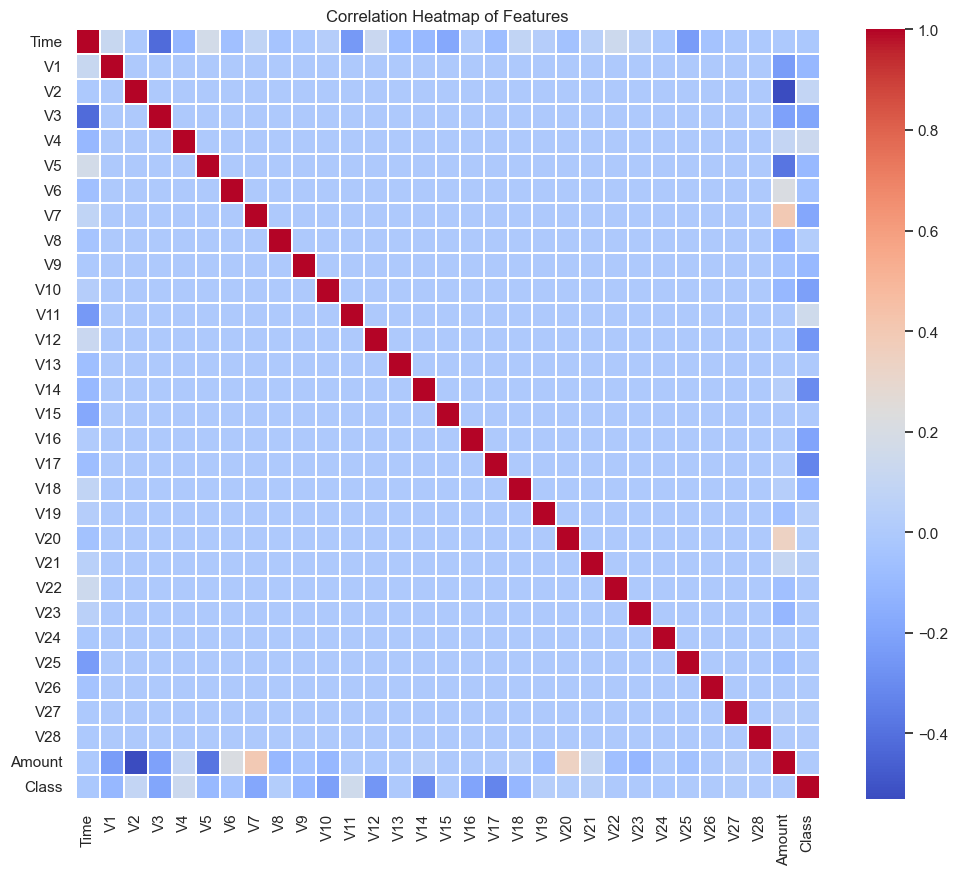

In [11]:
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1)
plt.title("Correlation Heatmap of Features")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11292\4166257512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\miniconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pa

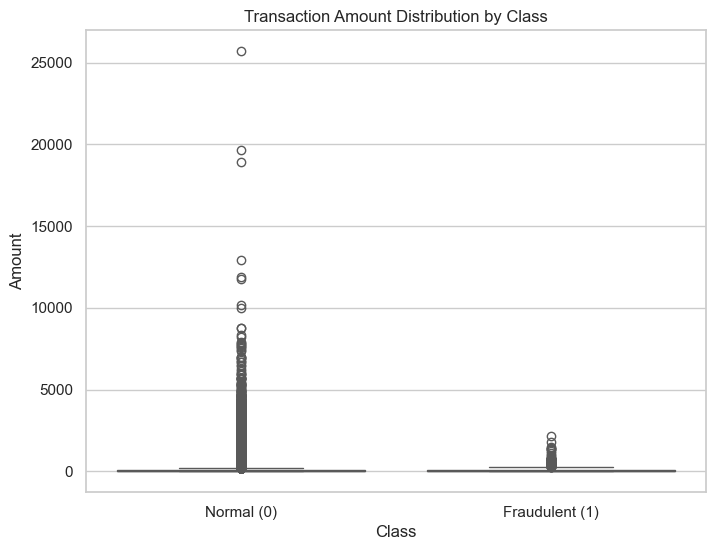

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.xticks([0, 1], ['Normal (0)', 'Fraudulent (1)'])
plt.show()


c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\miniconda3\Lib\site-packages\seaborn\_base.py:948: FutureWa

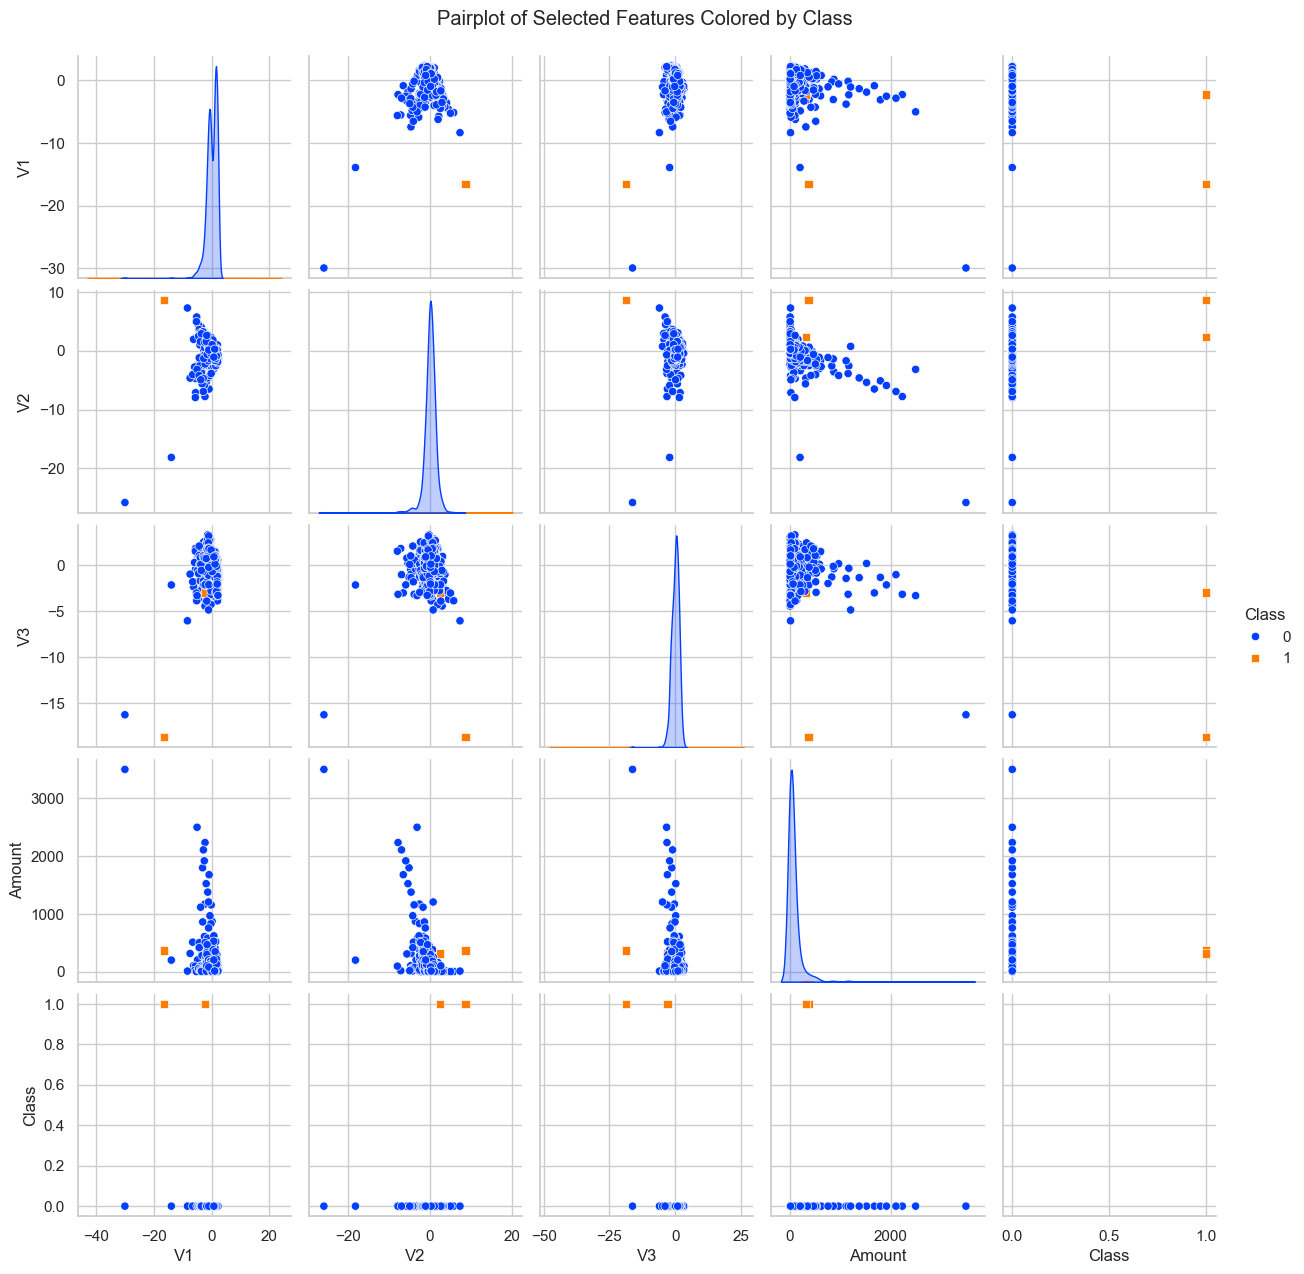

In [15]:

selected_features = ['V1', 'V2', 'V3', 'Amount', 'Class']

sample_data = data.sample(n=1000, random_state=42)

sns.pairplot(sample_data, vars=selected_features, hue='Class', palette='bright', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairplot of Selected Features Colored by Class", y=1.02)
plt.show()


In [20]:
# Initialize scaler
scaler = StandardScaler()

# Scale 'Amount' and 'Time'
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])


In [22]:
X = data.drop('Class', axis=1) 
y = data['Class']              

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [23]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

print("\nClass distribution in Training set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in Validation set:\n", y_val.value_counts(normalize=True))
print("\nClass distribution in Test set:\n", y_test.value_counts(normalize=True))

Training set shape: (170883, 30)
Validation set shape: (56962, 30)
Test set shape: (56962, 30)

Class distribution in Training set:
 Class
0    0.998274
1    0.001726
Name: proportion, dtype: float64

Class distribution in Validation set:
 Class
0    0.998262
1    0.001738
Name: proportion, dtype: float64

Class distribution in Test set:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [25]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9991222218320986

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.76      0.75        98

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56838    26]
 [   24    74]]


In [26]:
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9994382219725431

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.76      0.82        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56856     8]
 [   24    74]]


Results for criterion: gini
Accuracy: 0.9991222218320986
Precision: 0.74
Recall: 0.7551020408163265
F1 Score: 0.7474747474747474

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.76      0.75        98

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



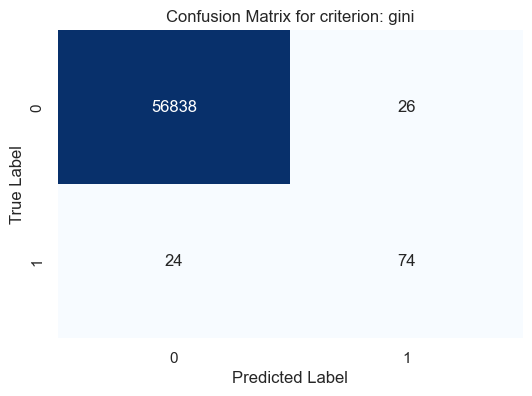

Results for criterion: entropy
Accuracy: 0.9992451107756047
Precision: 0.8021978021978022
Recall: 0.7448979591836735
F1 Score: 0.7724867724867726

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.74      0.77        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



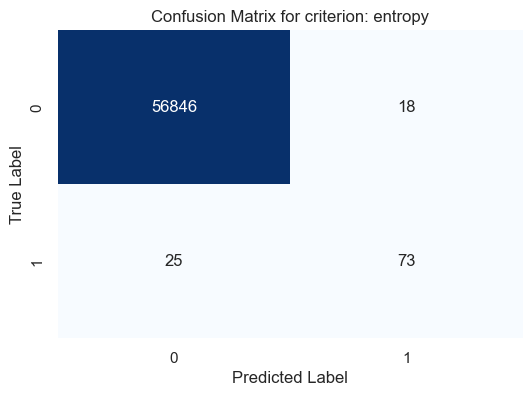

Results for criterion: log_loss
Accuracy: 0.9992451107756047
Precision: 0.8021978021978022
Recall: 0.7448979591836735
F1 Score: 0.7724867724867726

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.74      0.77        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



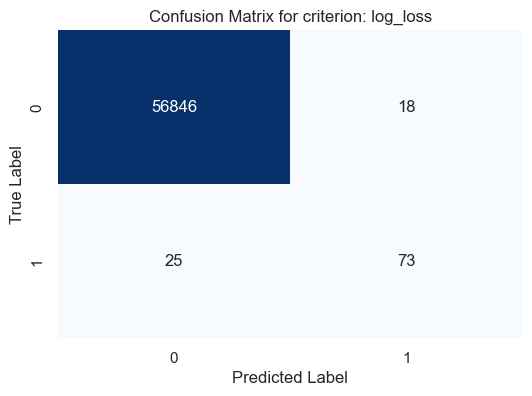

In [28]:
def evaluate_decision_tree(criterion_name):
    tree_model = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    
    print(f"Results for criterion: {criterion_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for criterion: {criterion_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

evaluate_decision_tree("gini")
evaluate_decision_tree("entropy")
evaluate_decision_tree("log_loss")


In [30]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best F1 Score achieved:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Test Recall:", recall_score(y_test, y_pred, pos_label=1))
print("Test F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best F1 Score achieved: 0.8159780070842018

Test Accuracy: 0.9994382219725431
Test Precision: 0.875
Test Recall: 0.7857142857142857
Test F1 Score: 0.8279569892473119

Confusion Matrix:
 [[56853    11]
 [   21    77]]


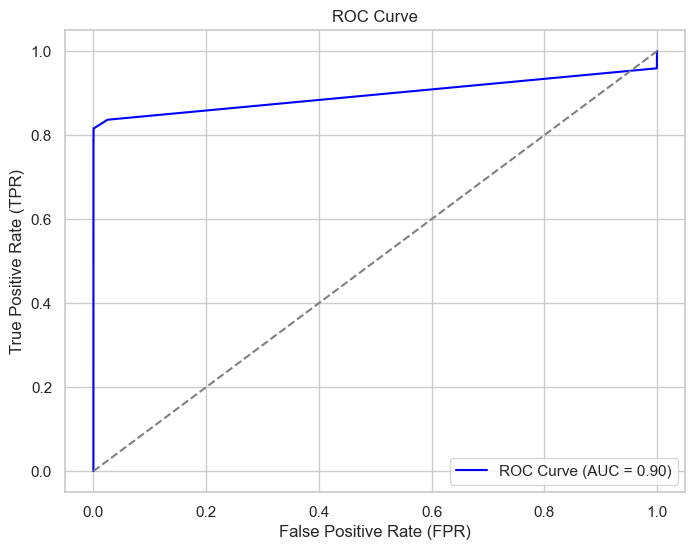

In [32]:
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # خط ۴۵ درجه
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()